# Knowledge Base

This part of the expert system contains the specialized information, rules, and facts that the system uses to make decisions and solve problems.
It consists of eight components:

   1.  Machine description
   2.  Data point definition
   3.  EnPI definition
   4.  Energy information
   5.  Fuzzy rule base definition
   6.  Sample data
   7.  Case knowledge
   8.  Results

## 1. Machine description
<br>

The process begins with machining blanks in the EMAG VLC 100 Y turning and milling center. This is followed by an intermediate water-based cleaning step in the MAFAC JAVA cleaning machine. The components then undergo a tempering process in the IVA RH 655 gas nitriding furnace. Subsequently, two grinding operations are carried out on the EMAG VLC 100 GT grinding machine. Finally, the process concludes with water-based final cleaning of the components in the MAFAC KEA cleaning machine 
<br>

You find more information about the ETA Factory [here](https://www.ptw.tu-darmstadt.de/eta-fabrik/startseite/index.de.jsp).

![Machine description image](ETAproductionline.png)



## 2. Data point definition
<br>

Here is the overview of the _data points_ that are relevant to the machines.

Adjust the data point configuration <a href="../Helpers/helpers.ipynb">here</a>



<br>

| Data point name | Description   | Unit  |
|-----------------|---------------|--------|
| EMAG Y main power supply    | Active power of the machine EMAG Y | W |
| Java main power supply    | Active power of the machine Java | W |
| IVA RH65 main power supply    | Active power of the machine IVA RH65 | W |
| EMAG GT main power supply    | Active power of the machine EMAG GT | W |
| Kea main power supply    | Active power of the machine Kea | W |



## 3. EnPI definition
<br>

Here you find the _Energy Performance Indicators_ (EnPIs) that are used by the expert system.

Adjust the EnPI definitions here <a href="../Inference_Engine/EnPIs.py">here</a>

<br>

| EnPI   | Description   | Formula   | Units  |
|--------------------------|----------------------------------------------------------|--------------------------------------------------|----------------|
| Total time ${t}_{total}$  | Total observation period | | h |
| Total time ${t}_{np}$  | Non-production time in observation period| | h |
| Total energy ${E}_{total}$  | Total energy in observation period          |  | kWh        |
| Total energy ${E}_{np}$  | Non-production energy in observation period          |  | kWh        |
| Number per job ${n}_{i}$  | Repetitions of a manufacturing job          |  | 1        |
| Time per job ${t}_{i}$  | Total time per job | Total energy/Number of Jobs | kWh/job        |
| Minimum non-production time per machine $t_{m,np,min}$  | Minimum interruption-free non-productive time |  | h        |
| Average energy per job $\bar{E}_{i}$  | The average amount of energy consumed per job.          | Total energy/Number of Jobs | kWh        |
| Energetic variance of a job $s^2_i$       | The variability in energy consumption across a job.       |                             | (kWh)²
| Non-production energy factor NPEF  | Ratio of non-production energy demand and total energy demand | ${E}_{np}/{E}_{total}$ | 1    |
| Non-production time factor NPTF  | Ratio of non-production time and total time  | ${t}_{np}/{t}_{total}$ | 1              |
| Priority number for non-production energy $P_{\text{e,np}}$  | Inidcates potential efficiency gain by reducing non-productive energy |  | 1              |
| Priority number for non-production time $P_{\text{t,np}}$  | Inidcates potential efficiency gain by reducing non-productive time|  | 1    |
| Priority number for production energy $P_{\text{e,p}}$  | Inidcates potential efficiency gain by reducing production energy|  | 1    |
| Overall priority $P_{\text{combined}}$  | Inidcates overall potential efficiency gain by combining $P_{\text{e,np}}$, $P_{\text{t,np}}$, and $P_{\text{e,p}}$ |  | 1    |


## 4. Energy information
<br>

To assess energy performance at the line level for all machines, machining cycles are identified as energy-relevant information. Machining cycles refer to cyclically recurring manufacturing operations performed in the productive, value-adding state working of a machine.<br>




<br>
The following example shows how machining cycles can be defined for a machine and a specific job.
<br>

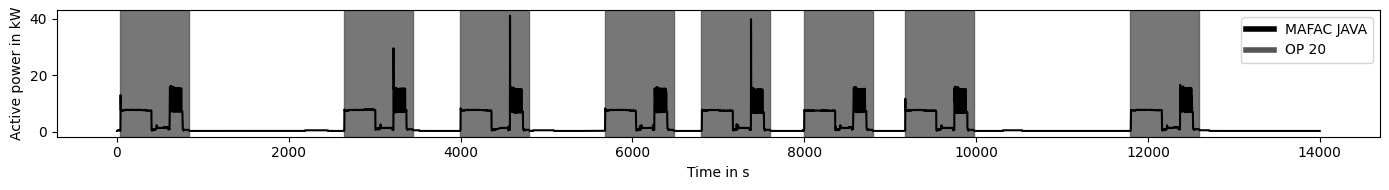

In [1]:
import sys
import os
import pandas as pd

def load_data():
    # Load the sample data
    sample_data = pd.read_csv('Sample_Data/sample_data.csv', sep=';', header=0, decimal=",")
    return sample_data


data = load_data()


# Add the Helpers directory to the system path
sys.path.append(os.path.join(os.getcwd(), '..', 'Helpers'))

from algorithms import MotifFinder
from visualizer import JobPlotter


# Instantiate MotifFinder and Add Patterns
finder = MotifFinder(data)

# Add pattern for the machine "Java" and the jop "OP 20"
finder.add_pattern("MAFAC JAVA", 3996, 4801, 0.6, "OP 20")

# Find Motifs and Plot Results
motif_results = finder.find_motifs()

# Create an instance of JobPlotter
plotter = JobPlotter(data, motif_results)

# Plot the data
plotter.plot()



## 5. Fuzzy rule base definition
<br>

You find the rule base implementation <a href="../Inference_Engine/FIS.py">here</a>

<br>

#### Rule base 1: Minimization of non-productive energy share

The higher the priority number $P_{\text{e,np}} ∈[0,1]$ , the greater the potential efficiency gain by reducing non-productive energy.


1. If $NPEF$ high AND $NPTF$ high THEN $P_{\text{e,np}}$ very high
2. If $NPEF$ medium AND $NPTF$ high THEN $P_{\text{e,np}}$ high
3. If $NPEF$ low AND $NPTF$ high THEN $P_{\text{e,np}}$ medium
4. If $NPEF$ high AND $NPTF$ medium THEN $P_{\text{e,np}}$ high
5. If $NPEF$ medium AND $NPTF$ medium THEN $P_{\text{e,np}}$ medium
6. If $NPEF$ low AND $NPTF$ medium THEN $P_{\text{e,np}}$ low
7. If $NPEF$ high AND $NPTF$ low THEN $P_{\text{e,np}}$ medium
8. If $NPEF$ medium AND $NPTF$ low THEN $P_{\text{e,np}}$ low
9. If $NPEF$ low AND $NPTF$ low THEN $P_{\text{e,np}}$ very low

#### Rule base 2: Minimization of non-productive time

The higher the priority number $P_{\text{t,np}} ∈[0,1]$ , the greater the potential efficiency gain by reducing non-productive time.

1. If $NPTF$ high AND $UTR$ low THEN $P_{\text{t,np}}$ very high
2. If $NPTF$ medium AND $UTR$ low THEN $P_{\text{t,np}}$ high
3. If $NPTF$ low AND $UTR$ high low $P_{\text{t,np}}$ medium
4. If $NPTF$ high AND $UTR$ medium THEN $P_{\text{t,np}}$ high
5. If $NPTF$ medium AND $UTR$ medium THEN $P_{\text{t,np}}$ medium
6. If $NPTF$ low AND $UTR$ medium THEN $P_{\text{t,np}}$ low
7. If $NPTF$ high AND $UTR$ high THEN $P_{\text{t,np}}$ low
8. If $NPTF$ medium AND $UTR$ high THEN $P_{\text{t,np}}$ low
9. If $NPTF$ low AND $UTR$ high THEN $P_{\text{t,np}}$ very low

#### Rule base 3: Minimization of production energy 

The higher the priority number $P_{\text{e,p}} ∈[0,1]$ , the greater the potential efficiency gain by reducing production energy.

1. If $\bar{E}_{i}$ high AND $n_i$ high AND $s^2_i$ high THEN $P_{\text{e,p}}$ very high
2. If $\bar{E}_{i}$ medium AND $n_i$ high AND $s^2_i$ high THEN $P_{\text{e,p}}$ very high
3. If $\bar{E}_{i}$ low AND $n_i$ high AND $s^2_i$ high THEN $P_{\text{e,p}}$ high
4. If $\bar{E}_{i}$ high AND $n_i$ medium AND $s^2_i$ high THEN $P_{\text{e,p}}$ high
5. If $\bar{E}_{i}$ medium AND $n_i$ medium AND $s^2_i$ high THEN $P_{\text{e,p}}$ medium
6. If $\bar{E}_{i}$ low AND $n_i$ medium AND $s^2_i$ high THEN $P_{\text{e,p}}$ low
7. If $\bar{E}_{i}$ high AND $n_i$ low AND $s^2_i$ high THEN $P_{\text{e,p}}$ medium
8. If $\bar{E}_{i}$ medium AND $n_i$ low AND $s^2_i$ high THEN $P_{\text{e,p}}$ low
9. If $\bar{E}_{i}$ low AND $n_i$ low AND $s^2_i$ high THEN $P_{\text{e,p}}$ low
10. If $\bar{E}_{i}$ high AND $n_i$ high AND $s^2_i$ medium THEN $P_{\text{e,p}}$ very high
11. If $\bar{E}_{i}$ medium AND $n_i$ high AND $s^2_i$ medium THEN $P_{\text{e,p}}$ high
12. If $\bar{E}_{i}$ low AND $n_i$ high AND $s^2_i$ medium THEN $P_{\text{e,p}}$ medium
13. If $\bar{E}_{i}$ high AND $n_i$ medium AND $s^2_i$ medium THEN $P_{\text{e,p}}$ high
14. If $\bar{E}_{i}$ medium AND $n_i$ medium AND $s^2_i$ medium THEN $P_{\text{e,p}}$ medium
15. If $\bar{E}_{i}$ low AND $n_i$ medium AND $s^2_i$ medium THEN $P_{\text{e,p}}$ low
16. If $\bar{E}_{i}$ high AND $n_i$ low AND $s^2_i$ medium THEN $P_{\text{e,p}}$ medium
17. If $\bar{E}_{i}$ medium AND $n_i$ low AND $s^2_i$ medium THEN $P_{\text{e,p}}$ low
18. If $\bar{E}_{i}$ low AND $n_i$ low AND $s^2_i$ medium THEN $P_{\text{e,p}}$ very low
19. If $\bar{E}_{i}$ high AND $n_i$ high AND $s^2_i$ low THEN $P_{\text{e,p}}$ high
20. If $\bar{E}_{i}$ medium AND $n_i$ high AND $s^2_i$ low THEN $P_{\text{e,p}}$ medium
21. If $\bar{E}_{i}$ low AND $n_i$ high AND $s^2_i$ low THEN $P_{\text{e,p}}$ low
22. If $\bar{E}_{i}$ high AND $n_i$ medium AND $s^2_i$ low THEN $P_{\text{e,p}}$ medium
23. If $\bar{E}_{i}$ medium AND $n_i$ medium AND $s^2_i$ low THEN $P_{\text{e,p}}$ medium
24. If $\bar{E}_{i}$ low AND $n_i$ medium AND $s^2_i$ low THEN $P_{\text{e,p}}$ low
25. If $\bar{E}_{i}$ high AND $n_i$ low AND $s^2_i$ low THEN $P_{\text{e,p}}$ medium
26. If $\bar{E}_{i}$ medium AND $n_i$ low AND $s^2_i$ low THEN $P_{\text{e,p}}$ low
27. If $\bar{E}_{i}$ low AND $n_i$ low AND $s^2_i$ low THEN $P_{\text{e,p}}$ very low

#### Rule base 4: Overall potential efficiency gain

The combined priority $P_{\text{combined}}$ of $P_{\text{e,np}}$, $P_{\text{t,np}}$, and $P_{\text{e,p}}$. The higher the value of any of these three priorities, the higher the final combined priority number.

1. If $P_{\text{e,np}}$ very high AND $P_{\text{t,np}}$ very high AND $P_{\text{e,p}}$ very high THEN $P_{\text{combined}}$ very high
2. If $P_{\text{e,np}}$ very high AND $P_{\text{t,np}}$ very high AND $P_{\text{e,p}}$ high THEN $P_{\text{combined}}$ very high
3. If $P_{\text{e,np}}$ very high AND $P_{\text{t,np}}$ high AND $P_{\text{e,p}}$ high THEN $P_{\text{combined}}$ high
4. If $P_{\text{e,np}}$ high AND $P_{\text{t,np}}$ high AND $P_{\text{e,p}}$ medium THEN $P_{\text{combined}}$ high
5. If $P_{\text{e,np}}$ medium AND $P_{\text{t,np}}$ high AND $P_{\text{e,p}}$ high THEN $P_{\text{combined}}$ high
6. If $P_{\text{e,np}}$ medium AND $P_{\text{t,np}}$ medium AND $P_{\text{e,p}}$ high THEN $P_{\text{combined}}$ medium
7. If $P_{\text{e,np}}$ high AND $P_{\text{t,np}}$ medium AND $P_{\text{e,p}}$ medium THEN $P_{\text{combined}}$ medium
8. If $P_{\text{e,np}}$ medium AND $P_{\text{t,np}}$ medium AND $P_{\text{e,p}}$ medium THEN $P_{\text{combined}}$ medium
9. If $P_{\text{e,np}}$ low AND $P_{\text{t,np}}$ medium AND $P_{\text{e,p}}$ medium THEN $P_{\text{combined}}$ low
10. If $P_{\text{e,np}}$ low AND $P_{\text{t,np}}$ low AND $P_{\text{e,p}}$ low THEN $P_{\text{combined}}$ very low
11. If $P_{\text{e,np}}$ low AND $P_{\text{t,np}}$ low AND $P_{\text{e,p}}$ medium THEN $P_{\text{combined}}$ low
12. If $P_{\text{e,np}}$ medium AND $P_{\text{t,np}}$ low AND $P_{\text{e,p}}$ low THEN $P_{\text{combined}}$ low
13. If $P_{\text{e,np}}$ high AND $P_{\text{t,np}}$ low AND $P_{\text{e,p}}$ low THEN $P_{\text{combined}}$ medium
14. If $P_{\text{e,np}}$ very high AND $P_{\text{t,np}}$ medium AND $P_{\text{e,p}}$ low THEN $P_{\text{combined}}$ medium

## 6. Sample data

<br> Sample data that demonstrates the required data format for successfully utilizing the expert system.
<br>
It can be found here: ['Sample_Data' directory](/tree/ES/Knowledge_Base/Sample_Data)
<br>

In [2]:

def display_description(sample_data):
    # Display the description of the data
    return print(sample_data.describe())


display_description(data)

       EMAG VLC100 Y    MAFAC JAVA    IVA RH 655  EMAG VLC100 GT     MAFAC KEA
count   14000.000000  14000.000000  14000.000000    14000.000000  13861.000000
mean     4364.445907   2788.469435   2847.957635     4862.882216   2462.784263
std      2259.139370   3924.101595   3178.671075     3689.534493   3562.302815
min      1094.930781    220.485580    182.665955      319.000000    109.449562
25%      2803.553371    226.335697    189.936230     2083.651518    112.280510
50%      2850.655798    461.099380   1036.083618     2232.651749   1966.122681
75%      6449.805916   7361.901001   7532.104859     8664.636787   1985.635742
max     14615.604880  41023.164060  26018.406250    16487.517470  18417.908200


## 7. Case knowledge
<br>
The case knowledge can be adjusted for each run of the expert system here.
<br>

### 7.1 Machining cycles


{'EMAG VLC100 Y': [(3640, 3963, 0.2, 'OP 10'), (11690, 11792, 0.2, 'OP 11')], 'MAFAC JAVA': [(3996, 4801, 0.6, 'OP 20')], 'IVA RH 655': [(1112, 4701, 0.6, 'OP 30')], 'EMAG VLC100 GT': [(919, 982, 0.3, 'OP 40'), (4002, 4071, 0.8, 'OP 40'), (997, 1064, 0.5, 'OP 40'), (1155, 1228, 0.6, 'OP 40'), (623, 699, 0.4, 'OP 40'), (8868, 9025, 0.3, 'OP 41'), (9213, 9374, 0.3, 'OP 41'), (9734, 9895, 0.3, 'OP 41'), (9734, 9895, 0.3, 'OP 41'), (9908, 10070, 0.3, 'OP 41')], 'MAFAC KEA': [(380, 1134, 0.9, 'OP 50'), (1300, 2040, 0.2, 'OP 50'), (3429, 4180, 0.9, 'OP 50')]}
Plot saved as output_plot.pdf


<Figure size 1600x1000 with 0 Axes>

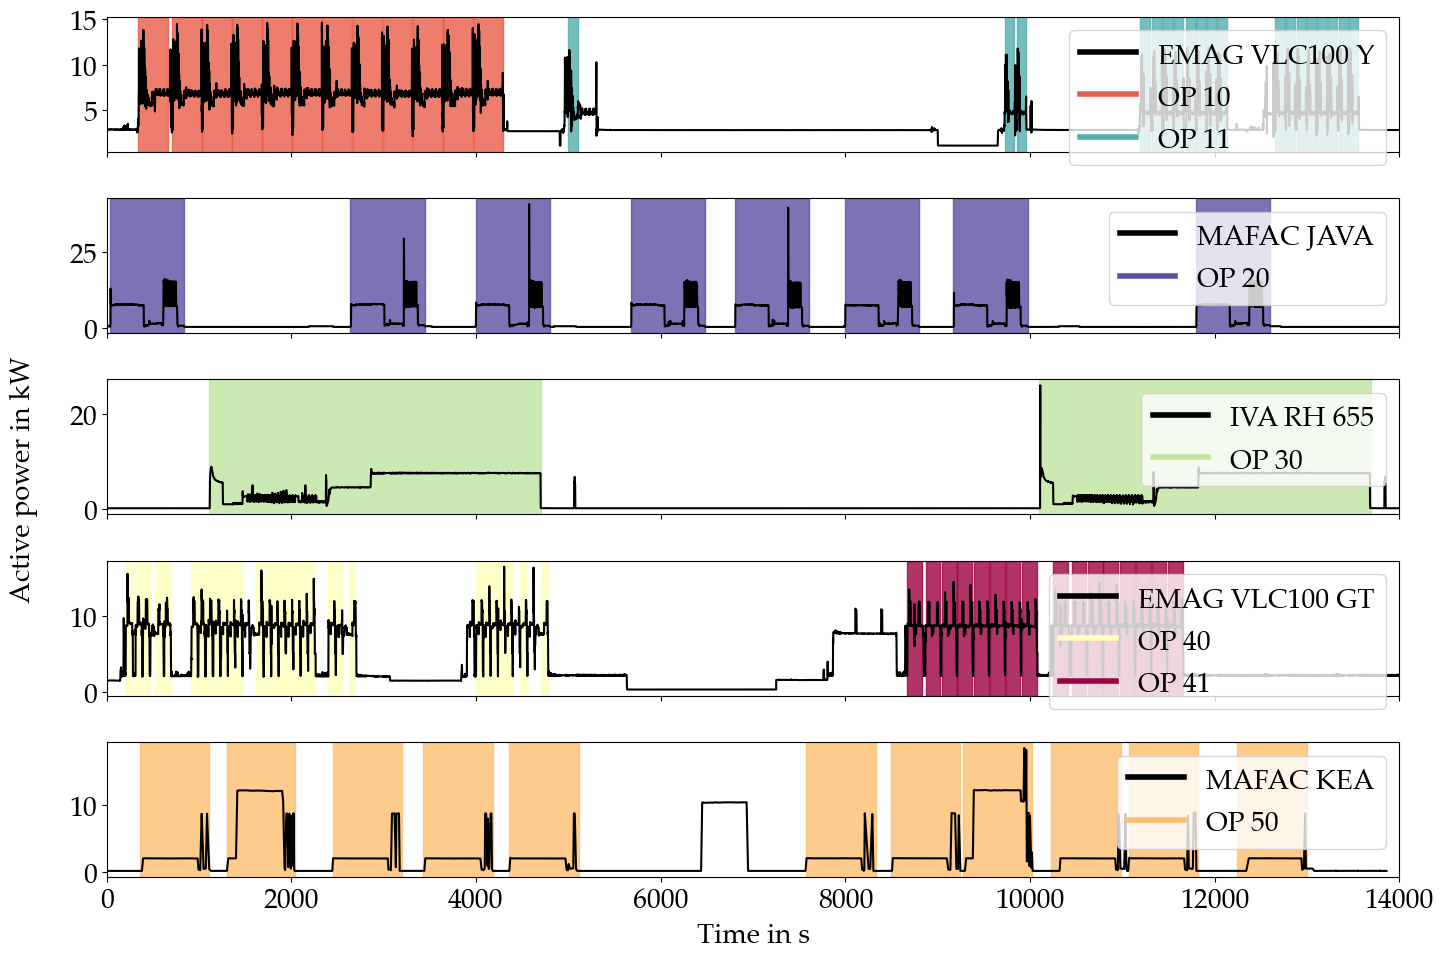

In [3]:
# Instantiate MotifFinder and Add Patterns
finder = MotifFinder(data)
finder.add_pattern("EMAG VLC100 Y", 3640, 3963, 0.2,"OP 10")
finder.add_pattern("EMAG VLC100 Y", 11690, 11792, 0.2, "OP 11")

finder.add_pattern("MAFAC JAVA", 3996, 4801, 0.6, "OP 20")

finder.add_pattern("IVA RH 655", 1112, 4701, 0.6, "OP 30")


finder.add_pattern("EMAG VLC100 GT", 919, 982, 0.3, "OP 40")
finder.add_pattern("EMAG VLC100 GT", 4002, 4071, 0.8,"OP 40")
finder.add_pattern("EMAG VLC100 GT", 997, 1064, 0.5, "OP 40")
finder.add_pattern("EMAG VLC100 GT", 1155, 1228, 0.6, "OP 40")
finder.add_pattern("EMAG VLC100 GT", 623, 699, 0.4, "OP 40")
finder.add_pattern("EMAG VLC100 GT", 8868, 9025, 0.3, "OP 41")
finder.add_pattern("EMAG VLC100 GT", 9213, 9374, 0.3, "OP 41")
finder.add_pattern("EMAG VLC100 GT", 9734, 9895, 0.3, "OP 41")
finder.add_pattern("EMAG VLC100 GT", 9734, 9895, 0.3, "OP 41")
finder.add_pattern("EMAG VLC100 GT", 9908, 10070, 0.3, "OP 41")

finder.add_pattern("MAFAC KEA", 380, 1134, 0.9, "OP 50")
finder.add_pattern("MAFAC KEA", 1300, 2040, 0.2, "OP 50")
finder.add_pattern("MAFAC KEA", 3429, 4180, 0.9, "OP 50")

# Find Motifs and Plot Results
motif_results = finder.find_motifs()

# Get the list of patterns and print them
patterns = finder.get_patterns()
print(patterns)

# Create an instance of JobPlotter
plotter = JobPlotter(data, motif_results)

# Plot the data
#plotter.plot()

from visualizer import JobPlotterColored
import matplotlib.pyplot as plt  # Import to access plt.savefig()
from matplotlib import rcParams



# Create the plot
plotterColored = JobPlotterColored(data, motif_results)

# Call the plot method, but don't display the plot immediately
# Adjust figure size and plot
fig = plt.figure(figsize=(16, 10))  # Adjust the size of the figure
plotterColored.plot()

# Save the plot as an SVG
plt.savefig("output_plot.pdf", format="pdf")
print("Plot saved as output_plot.pdf")

# Now display the plot
plt.show()




### 7.2 Number of simultaneously machined parts per job

In [4]:
# Number of simultaneously machined parts per job
op_counts = {"OP_10_parts": 1, "OP_11_parts": 1, "OP_20_parts": 5, "OP_30_parts": 11, "OP_40_parts": 1, "OP_41_parts": 1, "OP_50_parts": 7}

# Create the added_patterns dictionary
added_patterns = {}

# Iterate through the patterns dictionary
for name, ops in patterns.items():
    added_patterns[name] = [
        (*op, op_counts.get(f"{op[3].replace(' ', '_')}_parts", 0))  # Map "OP 10" -> "OP_10_parts"
        for op in ops
    ]

# Print the result
print(added_patterns)

{'EMAG VLC100 Y': [(3640, 3963, 0.2, 'OP 10', 1), (11690, 11792, 0.2, 'OP 11', 1)], 'MAFAC JAVA': [(3996, 4801, 0.6, 'OP 20', 5)], 'IVA RH 655': [(1112, 4701, 0.6, 'OP 30', 11)], 'EMAG VLC100 GT': [(919, 982, 0.3, 'OP 40', 1), (4002, 4071, 0.8, 'OP 40', 1), (997, 1064, 0.5, 'OP 40', 1), (1155, 1228, 0.6, 'OP 40', 1), (623, 699, 0.4, 'OP 40', 1), (8868, 9025, 0.3, 'OP 41', 1), (9213, 9374, 0.3, 'OP 41', 1), (9734, 9895, 0.3, 'OP 41', 1), (9734, 9895, 0.3, 'OP 41', 1), (9908, 10070, 0.3, 'OP 41', 1)], 'MAFAC KEA': [(380, 1134, 0.9, 'OP 50', 7), (1300, 2040, 0.2, 'OP 50', 7), (3429, 4180, 0.9, 'OP 50', 7)]}


## 8. Results
<br>
Once the system finishes its calculation the resulting EnPIs will be displayed by the code block below.



In [5]:
# Add the Helpers directory to the system path
sys.path.append(os.path.join(os.getcwd(), '..', 'inference_engine'))
from EnPIs import calculate_EnPIs
from FIS import FuzzyControlSystem, FuzzyCombinedSystem
from IPython.display import display, HTML
from visualizer import FuzzyVisualizer
import matplotlib.pyplot as plt


# Generate jobs DataFrame for each column with motifs
job_dataframes = finder.create_jobs_dataframe()
# Calculate Energy Performance Indicators (EnPIs) and store them in a dictionary

# Find Motifs and Plot Results
motif_results = finder.find_motifs()

# Calculate Energy Performance Indicators (EnPIs) and store them in a dictionary
EnPIs = calculate_EnPIs(job_dataframes, motif_results, op_counts)

def display_results_html(EnPIs):
    # Define the HTML template with placeholders
    results_html = """
    <div style="border: 2px solid #FFD700; padding: 10px; margin-top: 10px; background-color: #f9f9f9;">
        <h3>Interim  Results:</h3>
        <ul>
    """
    
    # Add each key-value pair to the HTML
    for key, value in EnPIs.items():
        if isinstance(value, float):
            results_html += f"<li><strong>{key}:</strong> {value:.8f}</li>\n"
        else:
            results_html += f"<li><strong>{key}:</strong> {value}</li>\n"
    
    # Close the HTML tags
    results_html += """
        </ul>
    </div>
    """
    
    # Display the results
    display(HTML(results_html))

EnPIs, normalized_EnPIs = calculate_EnPIs(job_dataframes, motif_results, op_counts)

# Display the results
display_results_html(EnPIs)

# Instantiate the fuzzy system
fuzzy_system = FuzzyControlSystem()

# Create an instance of FuzzyVisualizer
visualizer = FuzzyVisualizer()
# Instantiate FuzzyControlSystem 
control_system = FuzzyControlSystem()

# Get EnPIs, normalized_EnPIs from your previous code
machines = data.columns.tolist()
EnPIs, normalized_EnPIs = calculate_EnPIs(job_dataframes, motif_results, op_counts)

def get_jobs_from_patterns(added_patterns):
    jobs = set()  # Using a set to ensure unique job names
    for operations in added_patterns.values():
        for _, _, _, job, _ in operations:
            jobs.add(job)
    return list(jobs)  # Convert set to list for final result

# Get the list of jobs
jobs = get_jobs_from_patterns(added_patterns)

# Store highlighted input and output values for each machine
highlighted_values = []

# Iterate over machines to calculate P_e_np and P_t_np and collect the values for highlighting
for machine in machines:
    npef_value = normalized_EnPIs[f'NPEF for {machine}']
    nptf_value = normalized_EnPIs[f'NPTF for {machine}']
    UTR_value = normalized_EnPIs[f'UTR for {machine}']
    
    # Compute p_e_np and P_time for each machine
    p_e_np = fuzzy_system.set_input_P_energy(npef_value=npef_value, nptf_value=nptf_value)
    p_t_np = fuzzy_system.set_input_P_time(nptf_value=nptf_value, UTR_value=UTR_value)
    
    highlighted_values.append((npef_value, nptf_value, p_e_np))  # For fig4
    highlighted_values.append((nptf_value, UTR_value, p_t_np))  # For fig5
    
    print(f"\n{machine}:")
    print(f"P_e_np: {p_e_np}")
    print(f"P_t_np: {p_t_np}")

# Store highlighted values for jobs
for job in jobs:
    aej_value = normalized_EnPIs[f'Average energy per {job} cycle in kWh']
    n_i_value = normalized_EnPIs[f'Number of {job}']
    s2_i_value = normalized_EnPIs[f'Energy variance for {job}']
    
    # Compute P_prod for each job
    p_e_p = fuzzy_system.set_input_P_prod(aej_value=aej_value, n_i_value=n_i_value, s2_i_value=s2_i_value)
    
    highlighted_values.append((aej_value, n_i_value, p_e_p))  # For fig6
    
    print(f"\n{job}:")
    print(f"P_e_p: {p_e_p}")

'''
# Visualize the fuzzy rules for the fuzzy systems and highlight inputs/outputs
fig1 = visualizer.visualize_fuzzy_rules(control_system.P_energy_simulation, 
                                        ['Non productive energy factor', 'Non productive time factor'], 
                                        'Priority non-productive energy')

fig2 = visualizer.visualize_fuzzy_rules(control_system.P_time_simulation, 
                                        ['Non productive time factor', 'Minimum non-productive time per machine'], 
                                        'Priority non-productive time')

fig3 = visualizer.visualize_fuzzy_rules(control_system.P_prod_simulation, 
                                        ['Average energy per job', 'Number of jobs', 'Energetic variance of a job'], 
                                        'Priority productive energy')

# Show the plots
plt.show()
'''


EMAG VLC100 Y:
P_e_np: 0.7000000000000003
P_t_np: 0.29999999999999993

MAFAC JAVA:
P_e_np: 0.3
P_t_np: 0.3

IVA RH 655:
P_e_np: 0.3
P_t_np: 0.7

EMAG VLC100 GT:
P_e_np: 0.9222222222222223
P_t_np: 0.3

MAFAC KEA:
P_e_np: 0.3
P_t_np: 0.09752136752136752

OP 41:
P_e_p: 0.3

OP 10:
P_e_p: 0.23959396147839657

OP 50:
P_e_p: 0.3

OP 40:
P_e_p: 0.3

OP 30:
P_e_p: 0.5

OP 11:
P_e_p: 0.29999999999999993

OP 20:
P_e_p: 0.14918158615956534


"\n# Visualize the fuzzy rules for the fuzzy systems and highlight inputs/outputs\nfig1 = visualizer.visualize_fuzzy_rules(control_system.P_energy_simulation, \n                                        ['Non productive energy factor', 'Non productive time factor'], \n                                        'Priority non-productive energy')\n\nfig2 = visualizer.visualize_fuzzy_rules(control_system.P_time_simulation, \n                                        ['Non productive time factor', 'Minimum non-productive time per machine'], \n                                        'Priority non-productive time')\n\nfig3 = visualizer.visualize_fuzzy_rules(control_system.P_prod_simulation, \n                                        ['Average energy per job', 'Number of jobs', 'Energetic variance of a job'], \n                                        'Priority productive energy')\n\n# Show the plots\nplt.show()\n"